**Build Real time Google Play store data analytics - python**

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [6]:
df = pd.read_csv('googleplaystore.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Exploratory Data Analysis on Google Play Store

In [8]:
# Category
cat = df.Category.unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

So we got 34 category on this dat aset, let’s see which one is the famous category

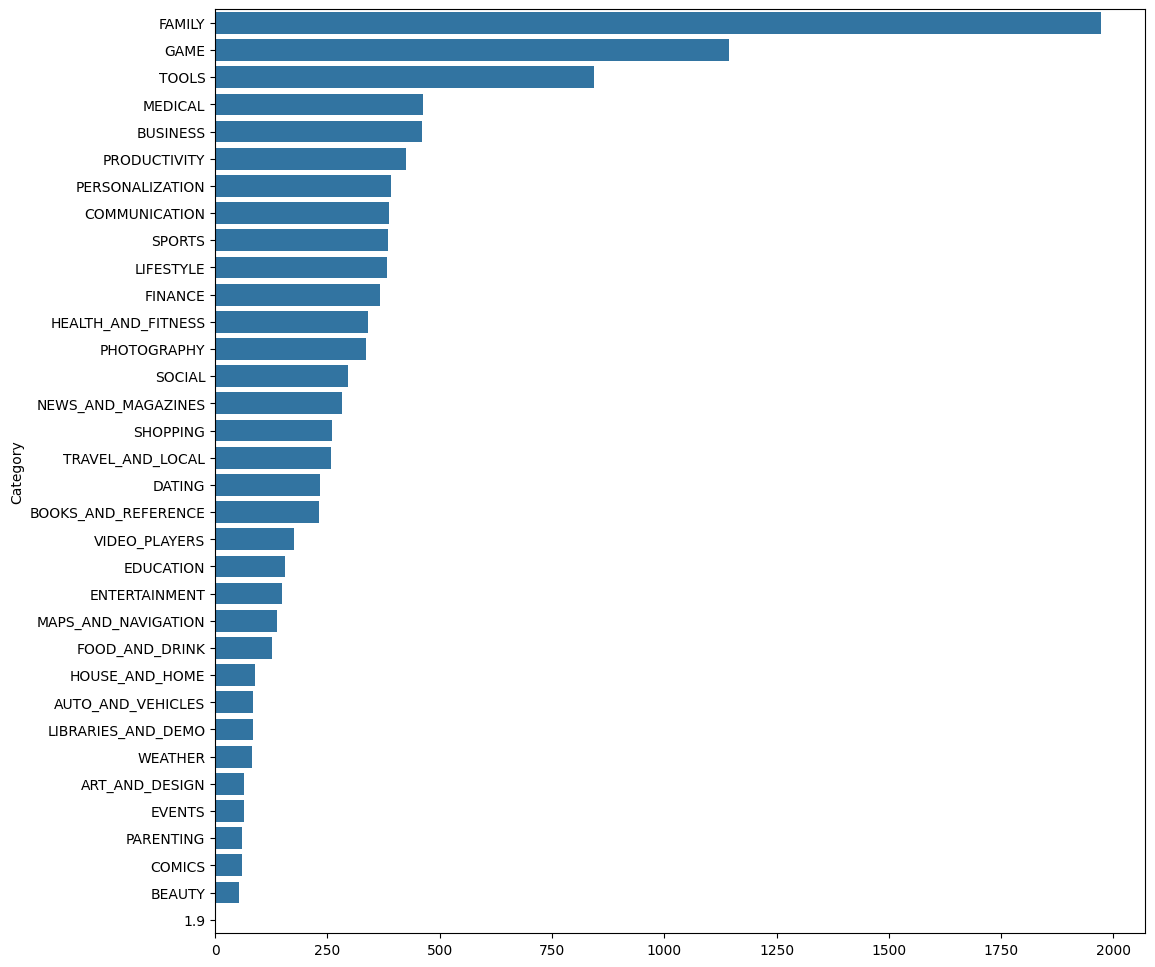

In [10]:
plt.figure(figsize=(12,12))
most_cat = df.Category.value_counts()
sns.barplot(x=most_cat.values, y=most_cat.index)
plt.show()

So, there is around 2000 app with family category, followed by game category with 1200 app. And this ‘1.9’ Category, i don’t know what it is, but it only had 1 app so far, so its not visible on the graph.

Let’s look at the rating, and what kind of correlation share between category and rating

In [11]:
# Rating
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There we had a null values, I am going to leave it as it is. And a 19 for rating is not possible, so i assume it’s a ‘1.9’. So let’s change it and see the distribution value on rating column.


<ipython-input-12-732ef6a7de97>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
<ipython-input-12-732ef6a7de97>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

<Axes: xlabel='Rating', ylabel='Density'>

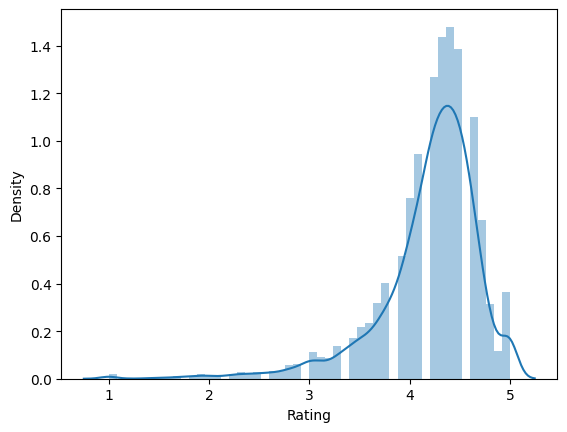

In [12]:
df['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
sns.distplot(df.Rating)

Most of the rating is around 4. Let’s see how rating is distributed by category column.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

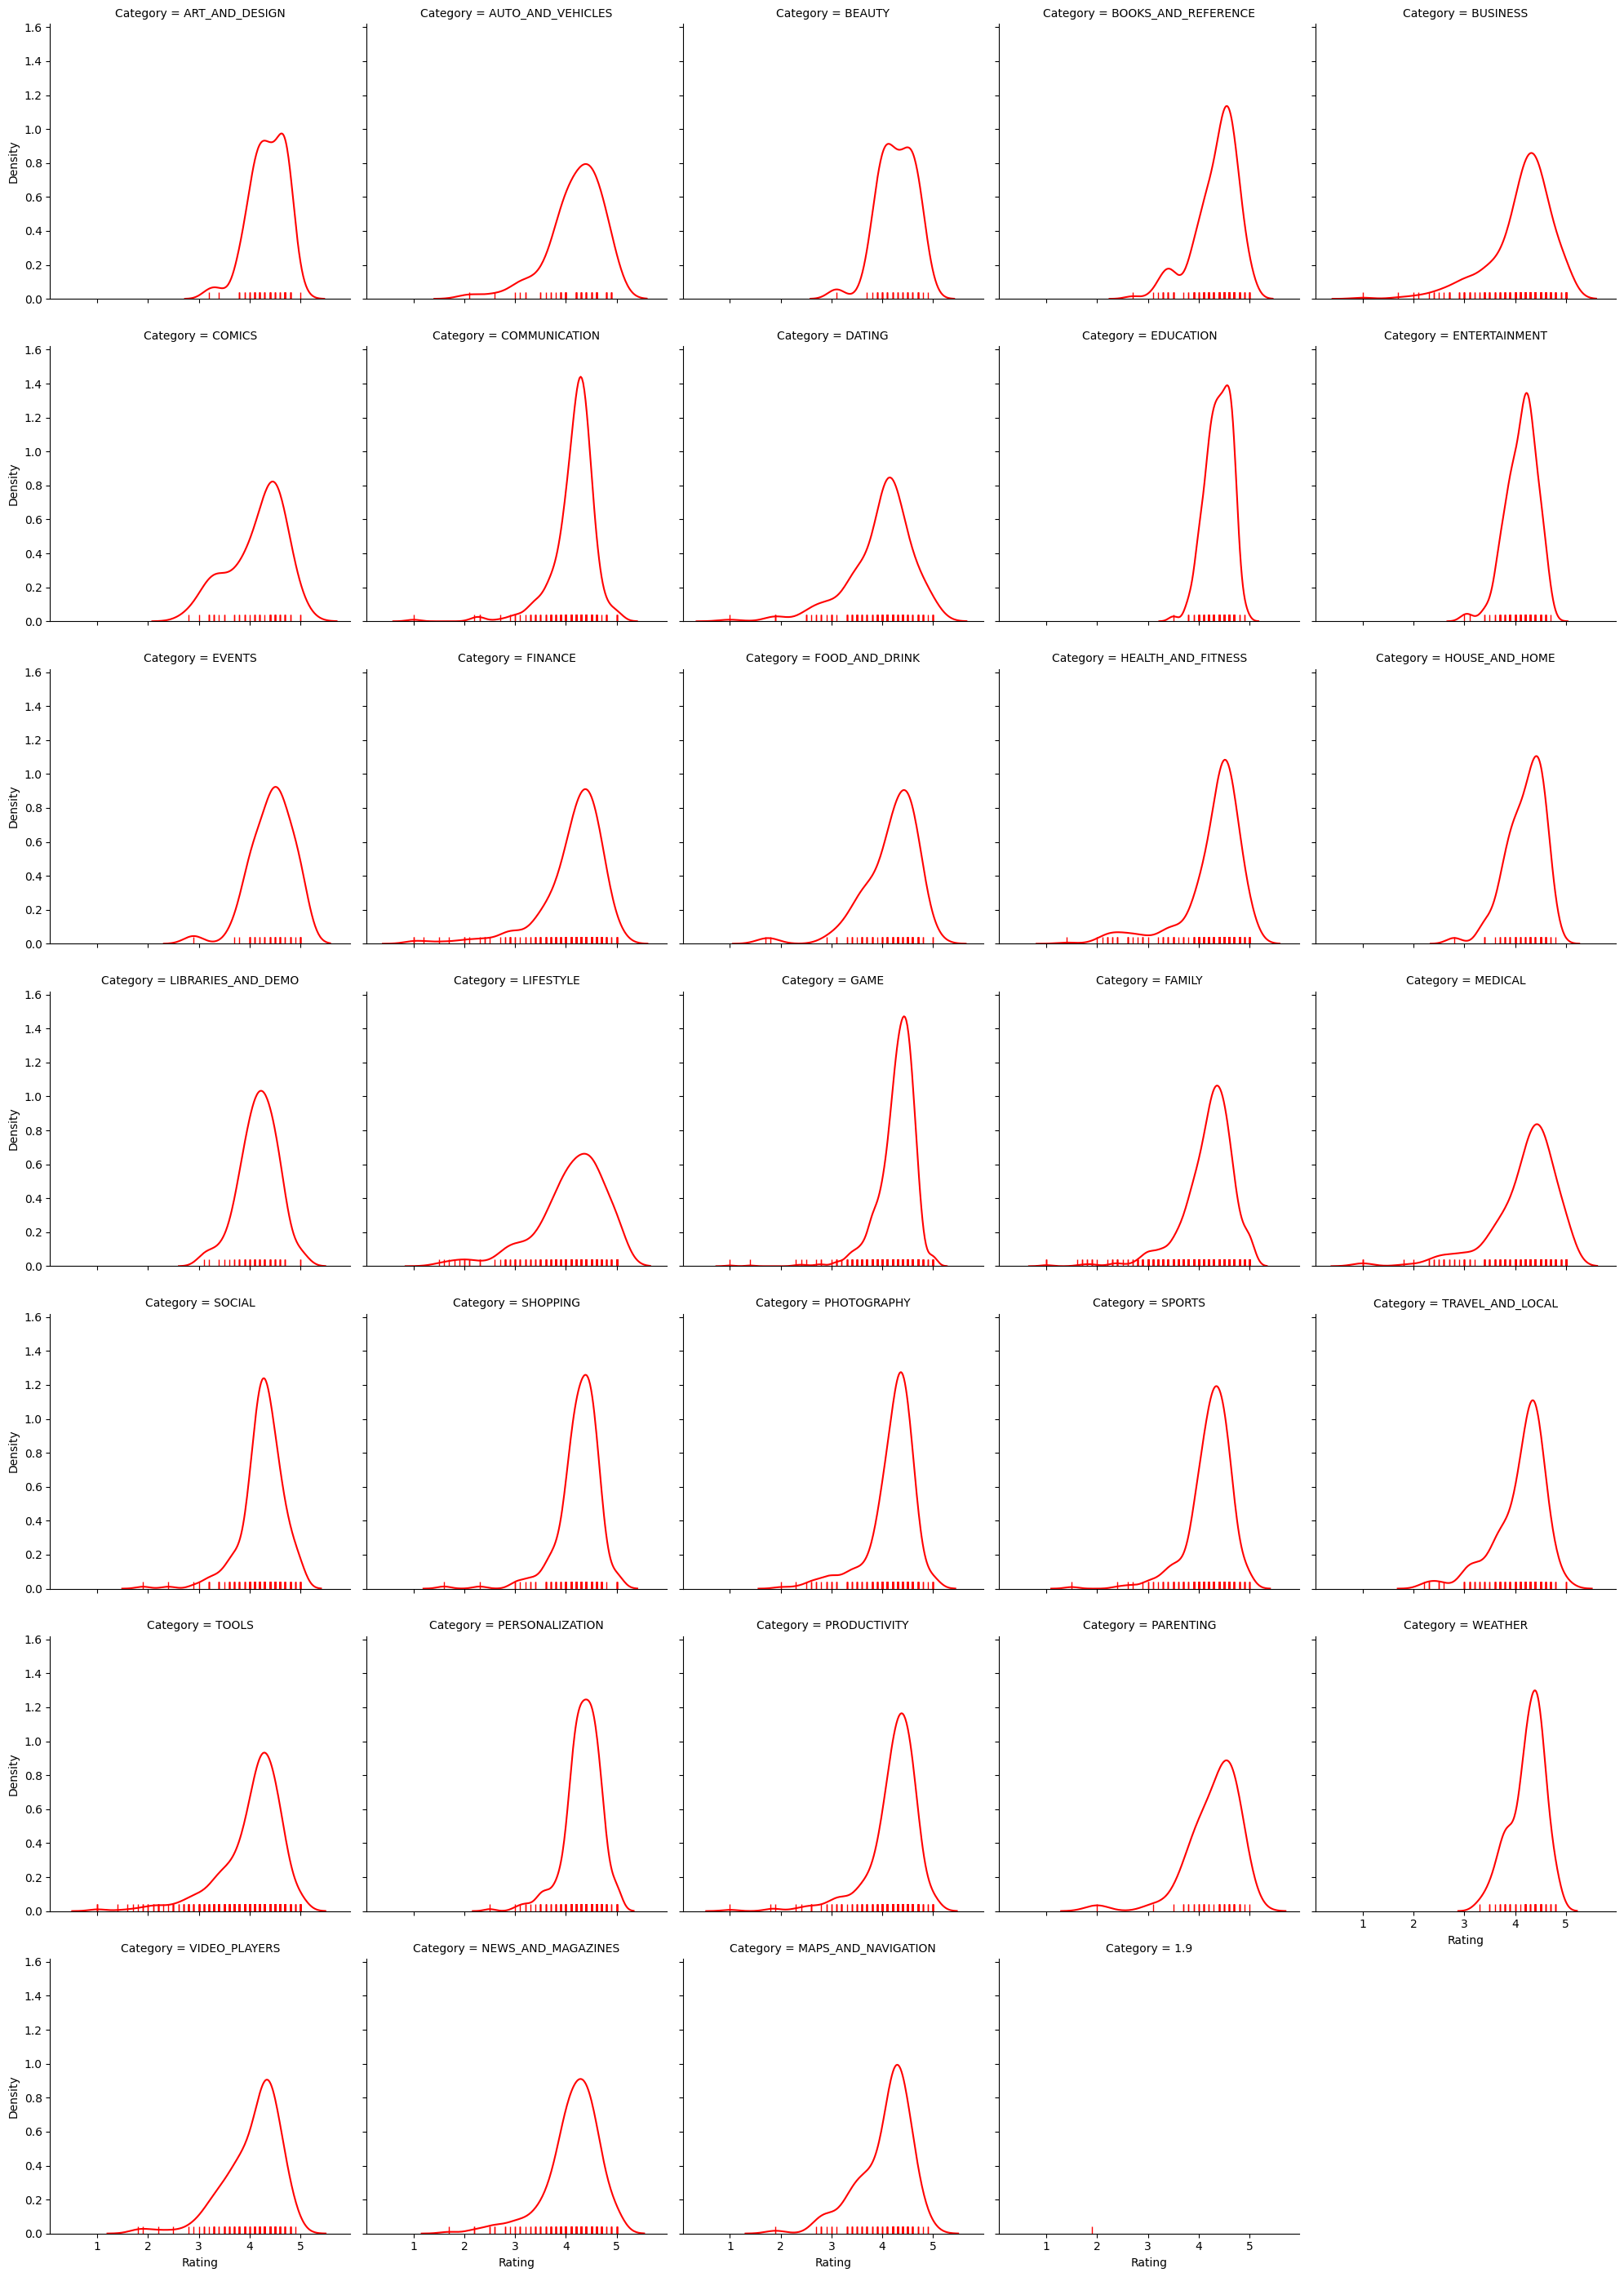

In [14]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="r"))

By the horizontal is the rating value, and vertically is quantity of the rating.

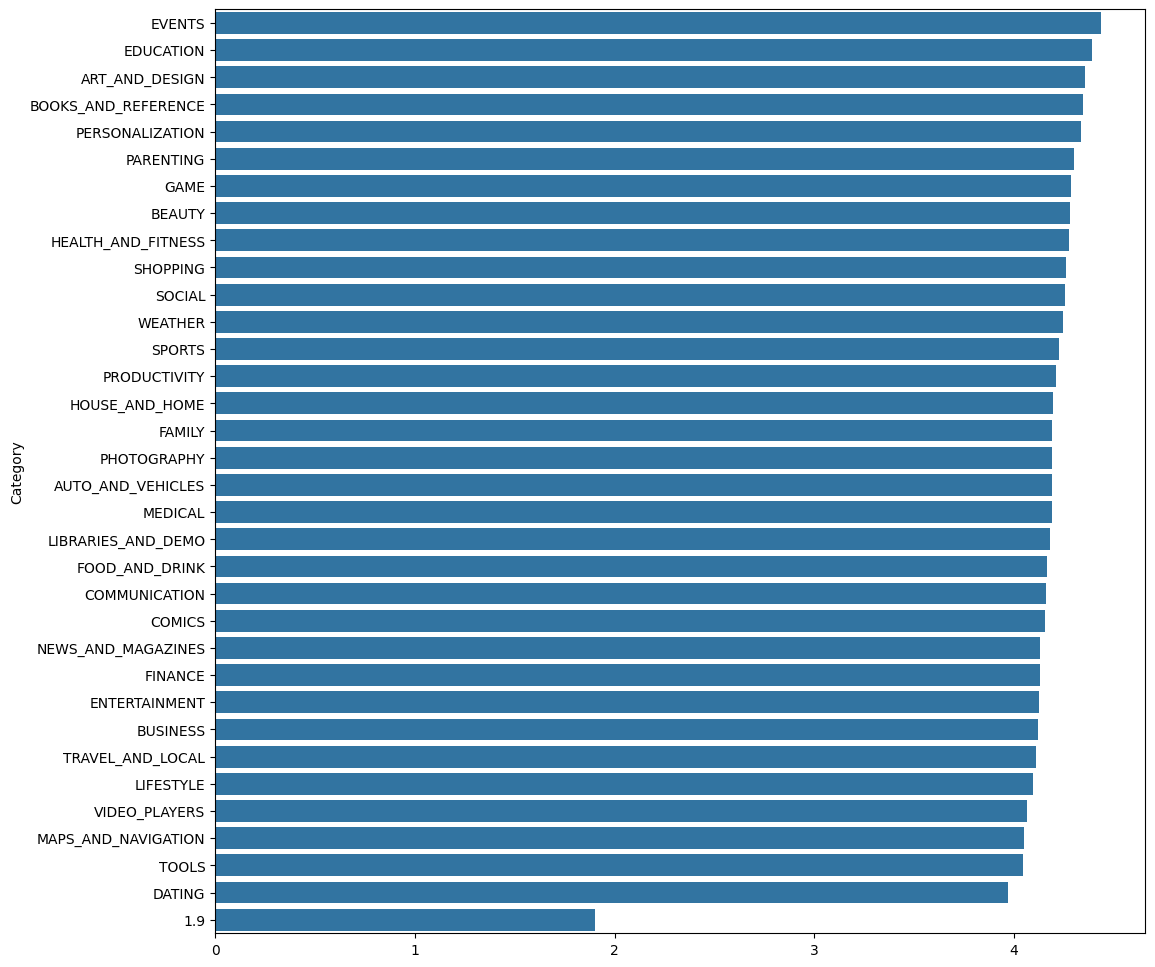

In [16]:
plt.figure(figsize=(12,12))
mean_rat = df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
# Remove 'data=df' and use 'mean_rat' values and index directly
sns.barplot(x=mean_rat.values, y=mean_rat.index)
plt.show()

And this is the average of rating by category, family and game has a lot of quantity causing the low on average rating, on the other side event has the highest average rating by category.

Next is reviews, review sometime can measure the app popularity. The more reviews, the better.

In [17]:
# Reviews
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

<ipython-input-18-7c8dc68c0a11>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Reviews)


<Axes: ylabel='Density'>

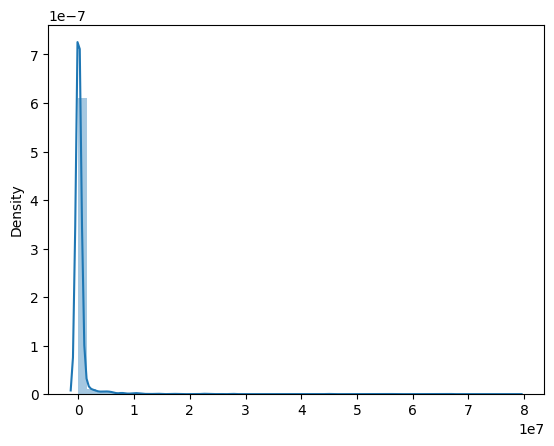

In [18]:
# inside review there is a value with 3.0M with M stand for million, lets change it so it can be measure as float

Reviews = []

for x in df.Reviews:
    x = x.replace('M','00')
    Reviews.append(x)

Reviews = list(map(float, Reviews))
df['reviews'] = Reviews
sns.distplot(Reviews)

This graph is the distribution of total reviews on each app.

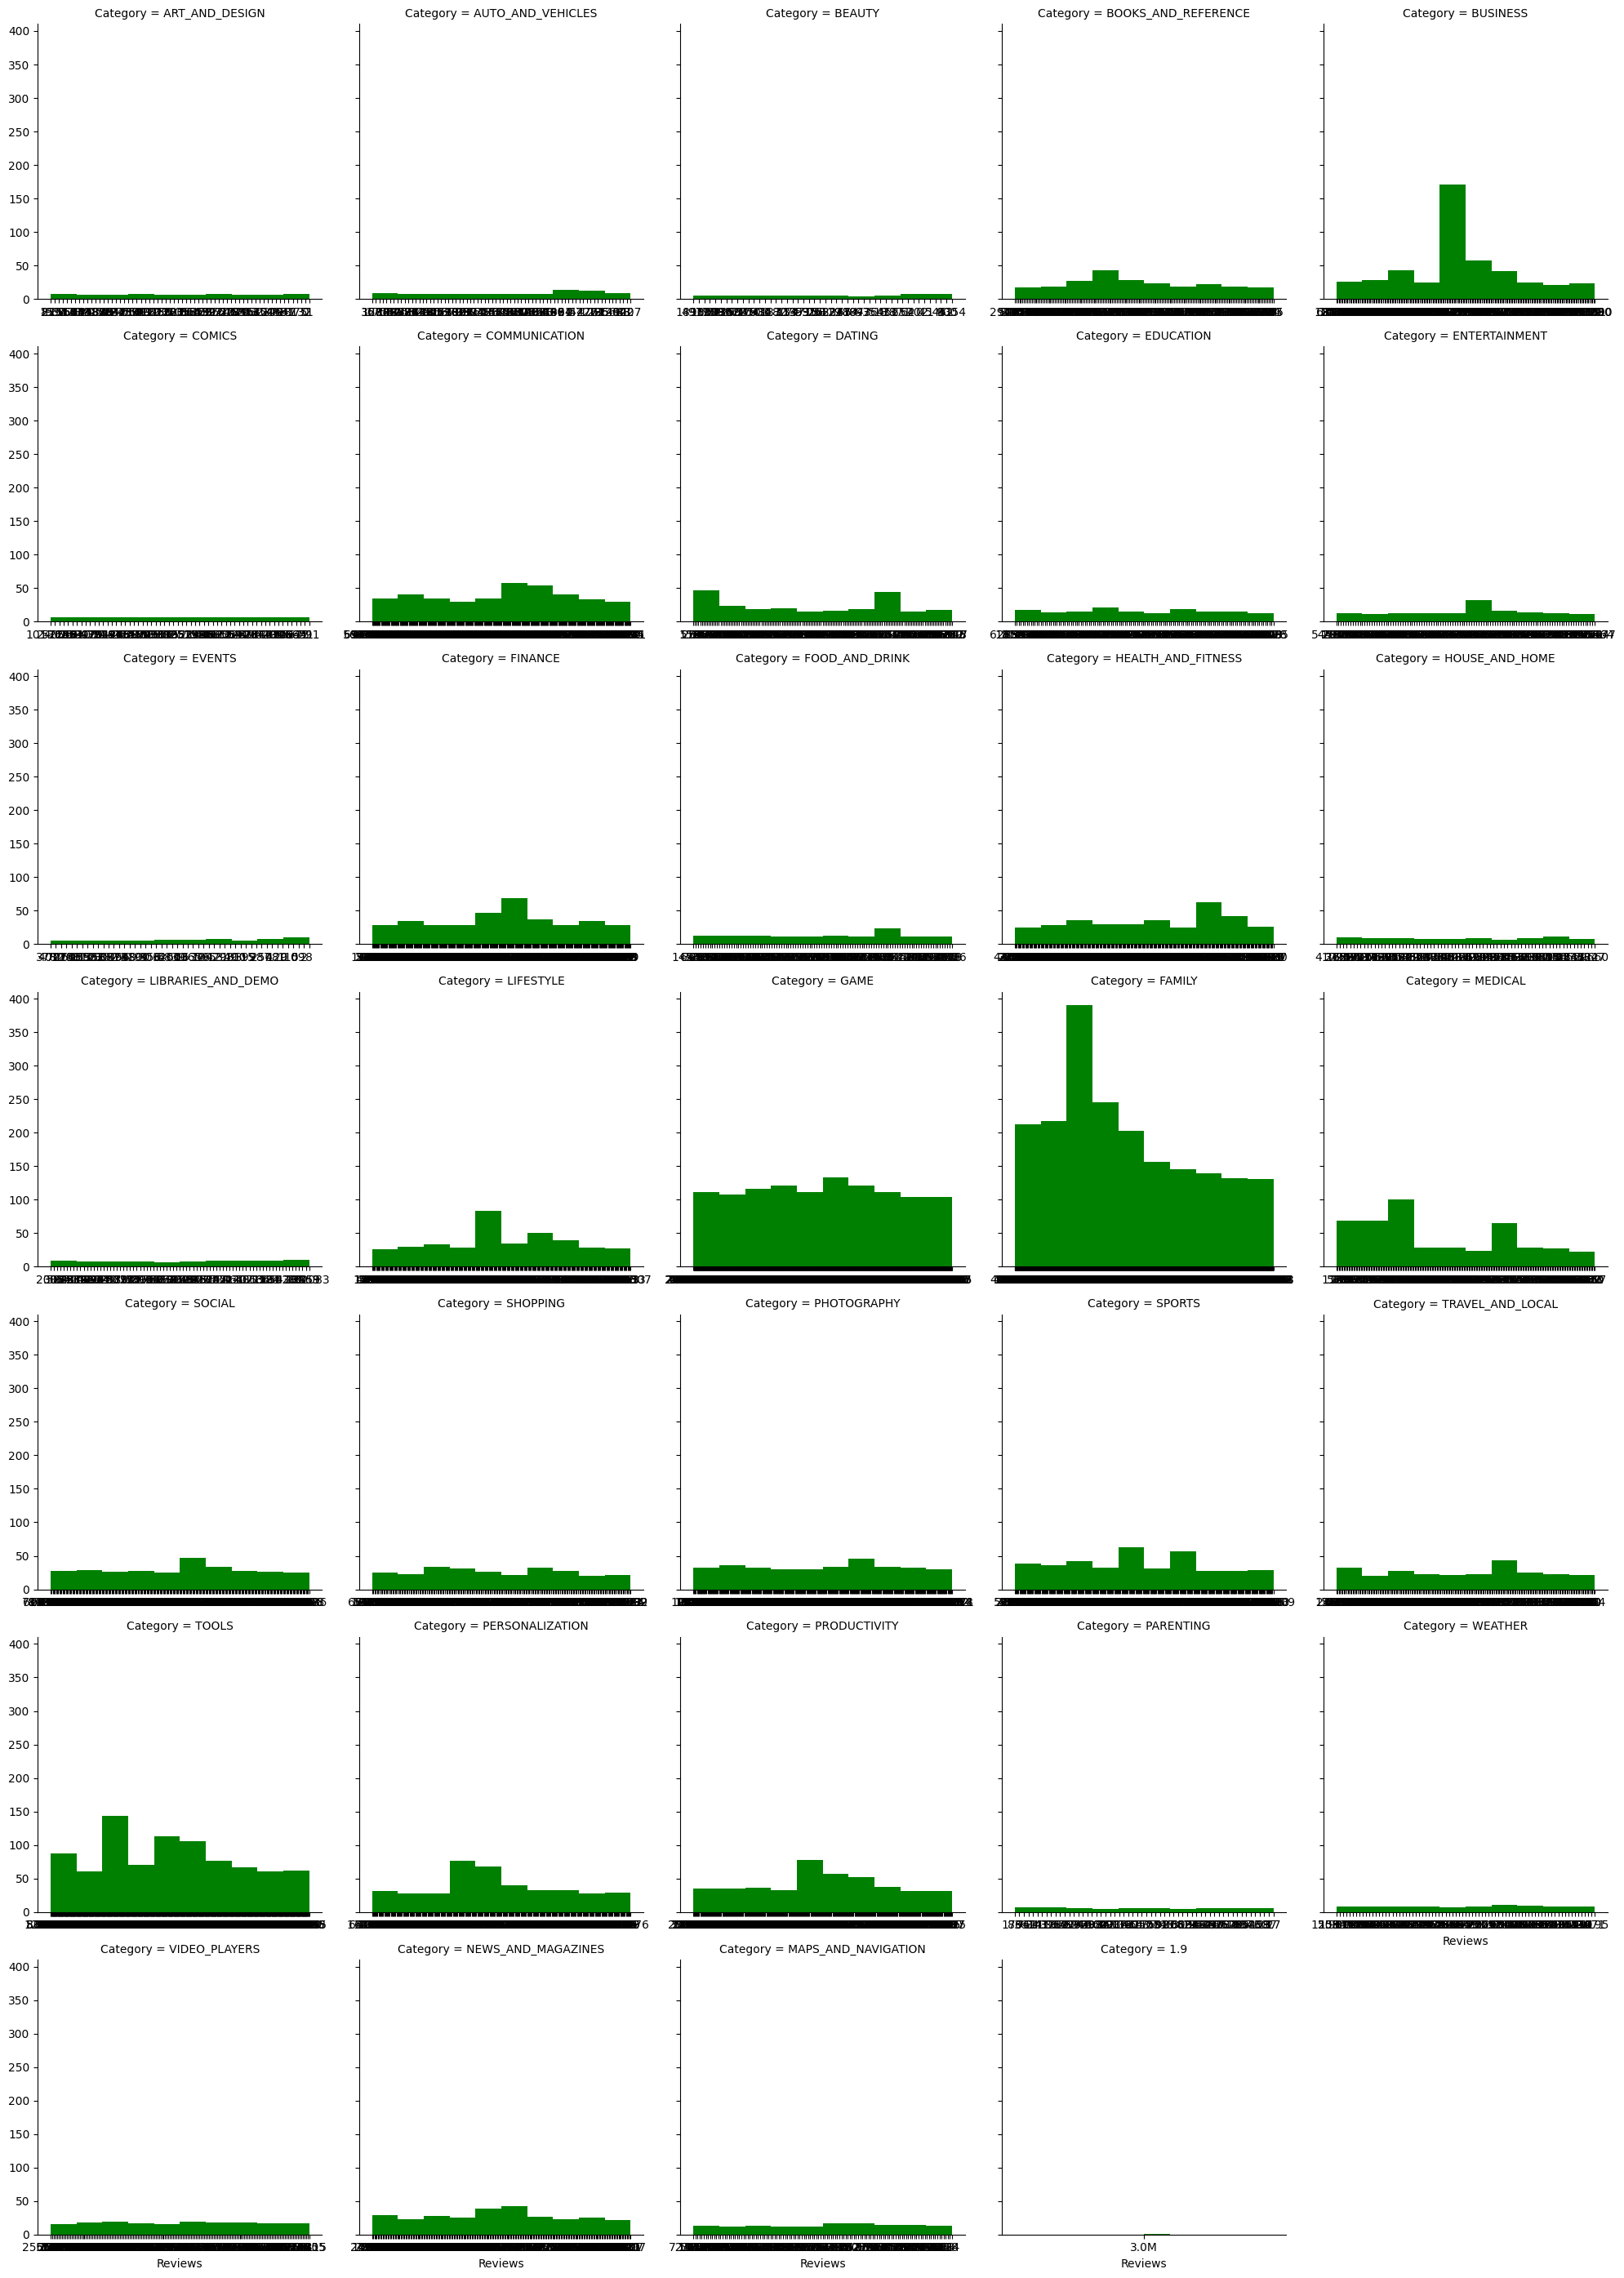

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Reviews' is a column of numerical data

g = sns.FacetGrid(df, col="Category", palette="Set1", col_wrap=5, height=4, sharex=False)
g.map(plt.hist, "Reviews", color="g")
plt.show()

This graph is the correlation between category and reviews, Family and game category had a lot of reviews.

Some app also almost had no review at all, like event, beauty, medical, parenting and more. it is interesting Event app has a high rating but rare review on it

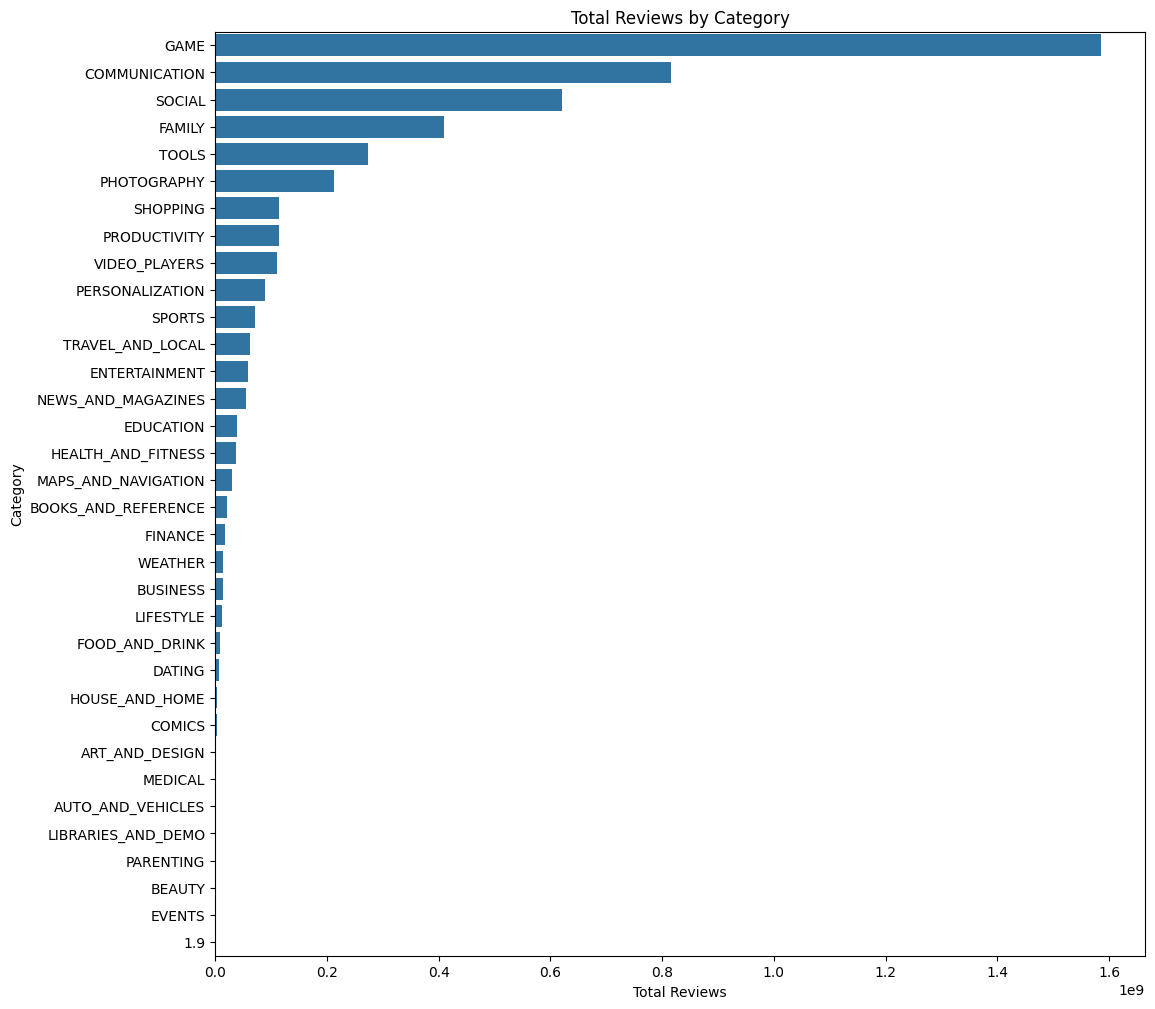

In [22]:
plt.figure(figsize=(12,12))  # Setting the figure size
sum_rew = df.groupby(['Category'])['reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew.values, y=sum_rew.index)  # Using values and index directly
plt.title('Total Reviews by Category')  # Adding a title
plt.xlabel('Total Reviews')  # Adding an x-axis label
plt.ylabel('Category')  # Adding a y-axis label
plt.show()

Showing the amount of total reviews.


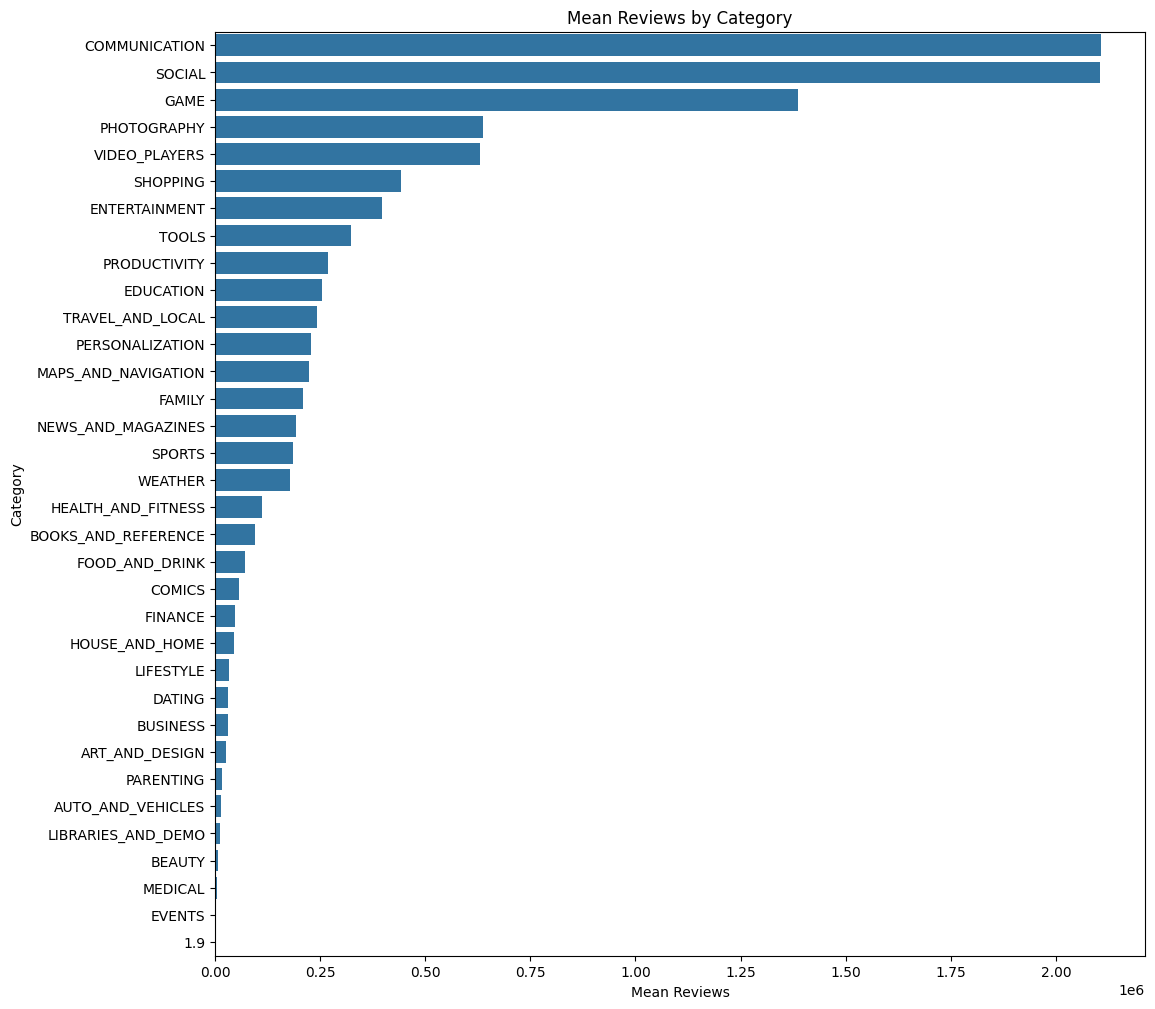

In [24]:
plt.figure(figsize=(12,12))
mean_rew = df.groupby(['Category'])['reviews'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rew.values, y=mean_rew.index)  # Remove 'data=df' and use values and index directly
plt.title('Mean Reviews by Category')  # Adding a title for clarity
plt.xlabel('Mean Reviews')  # Adding an x-axis label
plt.ylabel('Category')  # Adding a y-axis label
plt.show()

This is the average of reviews on each category. Let’s move on to next column, installs.

In [25]:
# Installs
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Now i’m going to transform this column into float as well like review. First we need to change the 0 and Free value to 0+.

Next we need to replace the ‘,’ value and discard the + sign form the value.

<ipython-input-26-55bd3c8ffa17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
<ipython-input-26-55bd3c8ffa17>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.gith

<Axes: ylabel='Density'>

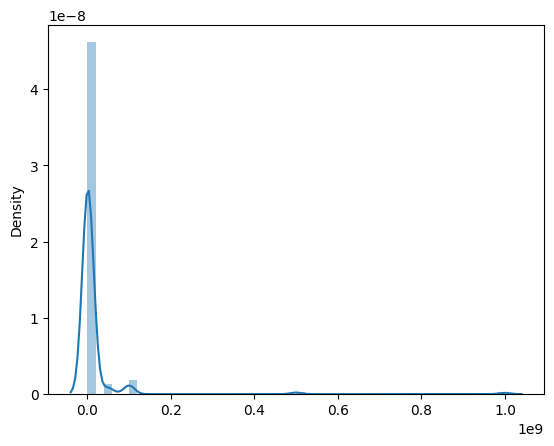

In [26]:
df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
Installs = []

for x in df.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
df['installs'] = Installs
sns.distplot(Installs)

Distributed value of Install on each category.

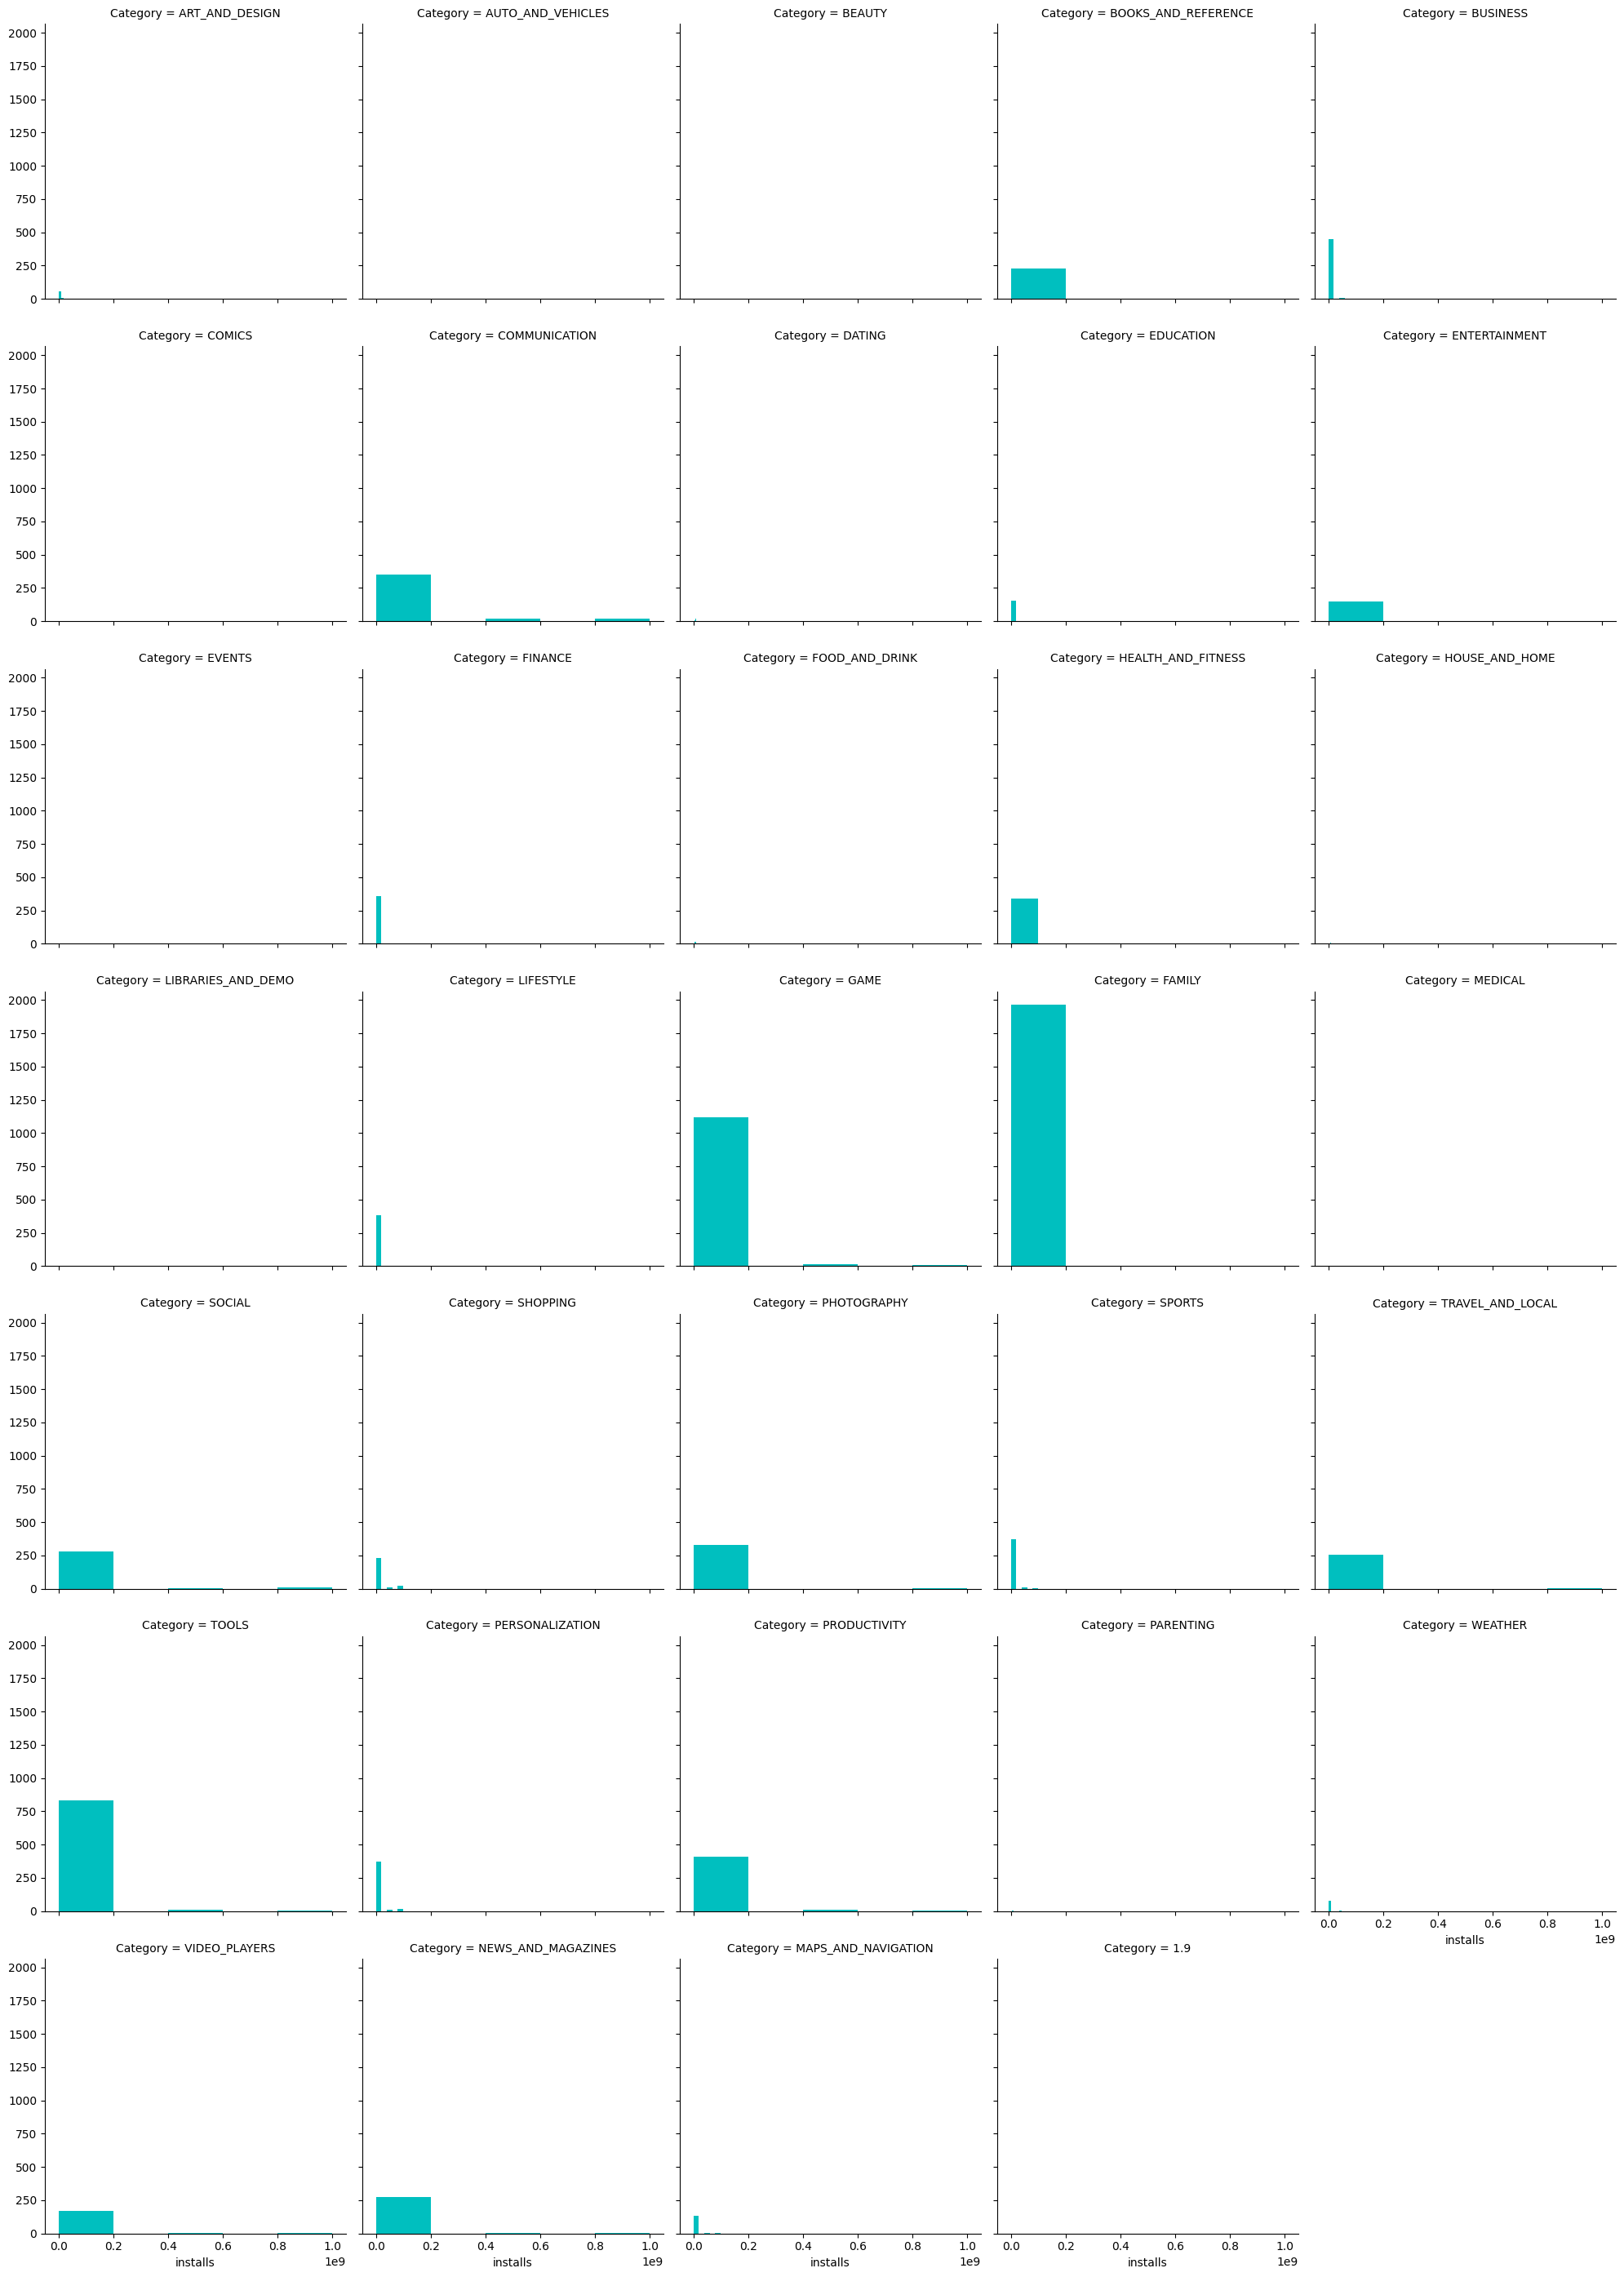

In [27]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(plt.hist, "installs", bins=5, color='c'))

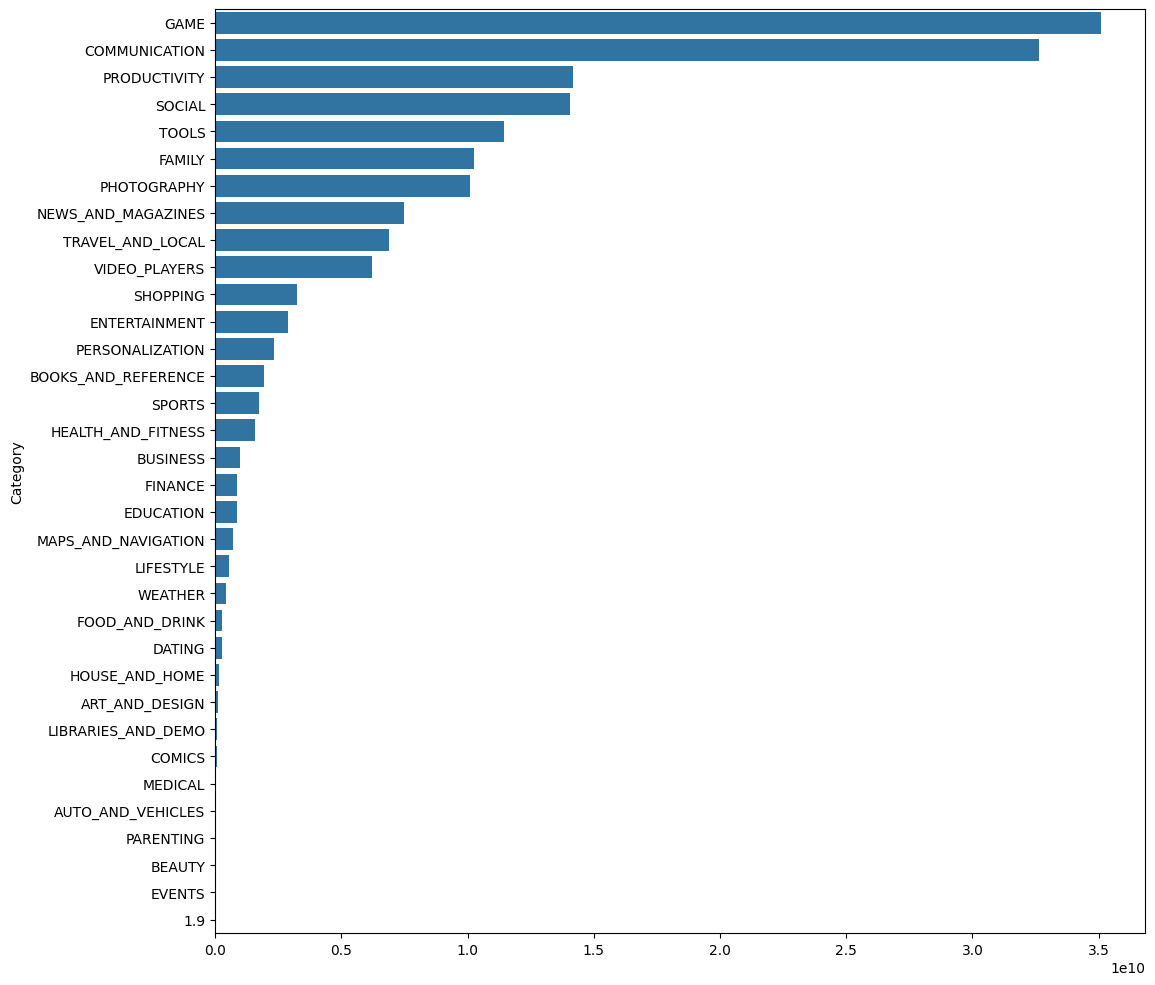

In [29]:
plt.figure(figsize=(12,12))
sum_inst = df.groupby(['Category'])['installs'].sum().sort_values(ascending=False)
# Remove 'data=df' and use 'sum_inst' values and index directly
sns.barplot(x=sum_inst.values, y=sum_inst.index)
plt.show()

The Type column, let’s check if the app is free or paid.

In [31]:
# Type for category
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

There is 0 and null value, let’s change them to free.

In [33]:
df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
df['Type'].fillna('Free', inplace=True)

<ipython-input-33-d527d03f6c59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)


Category           Type
1.9                Free      1
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: count, Length: 64, dtype: int64


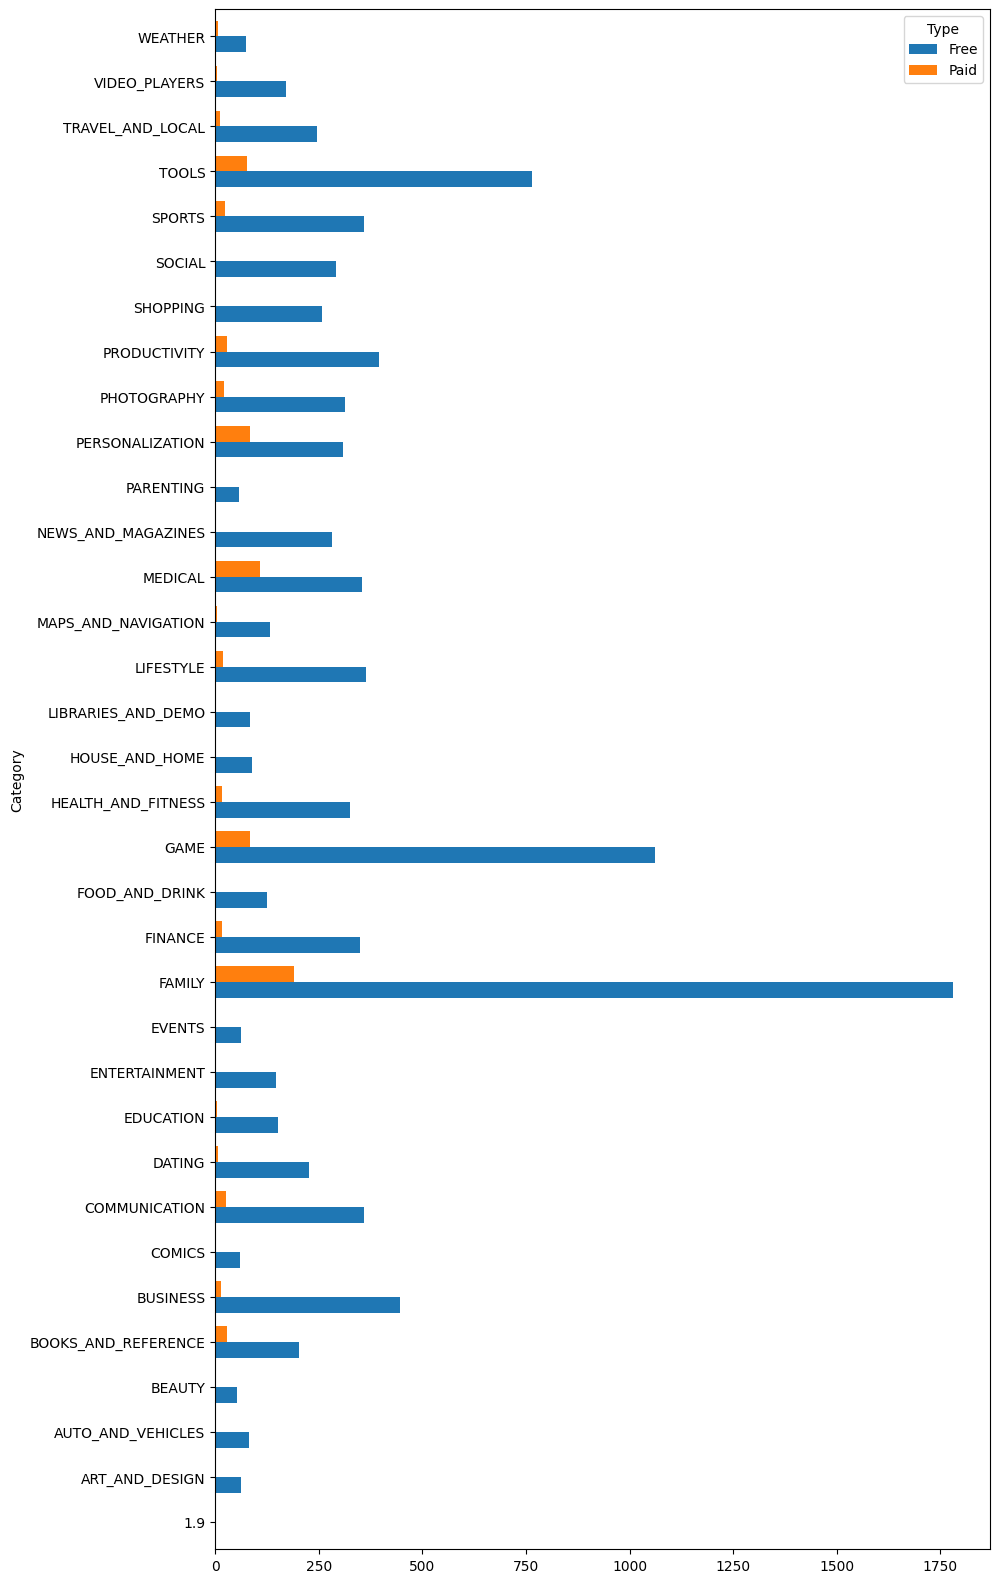

In [34]:
print(df.groupby('Category')['Type'].value_counts())
Type_cat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

So again, family category has the most free and paid app on the google play store. We can see social app is always free, like entertainment, event, education, comic, and more.

The medical has a high amount of paid app considering quantity of medical app is not much.

Last is the version of android you should have before accessing the app.

In [35]:
# Android Version
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [36]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

<ipython-input-36-0db49510b643>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)


Category        Android Ver
1.9             1.0             1
ART_AND_DESIGN  4.0            51
                2.0             9
                1.0             2
                3.0             2
                               ..
WEATHER         4.0            38
                1.0            26
                2.0            10
                5.0             7
                3.0             1
Name: count, Length: 200, dtype: int64


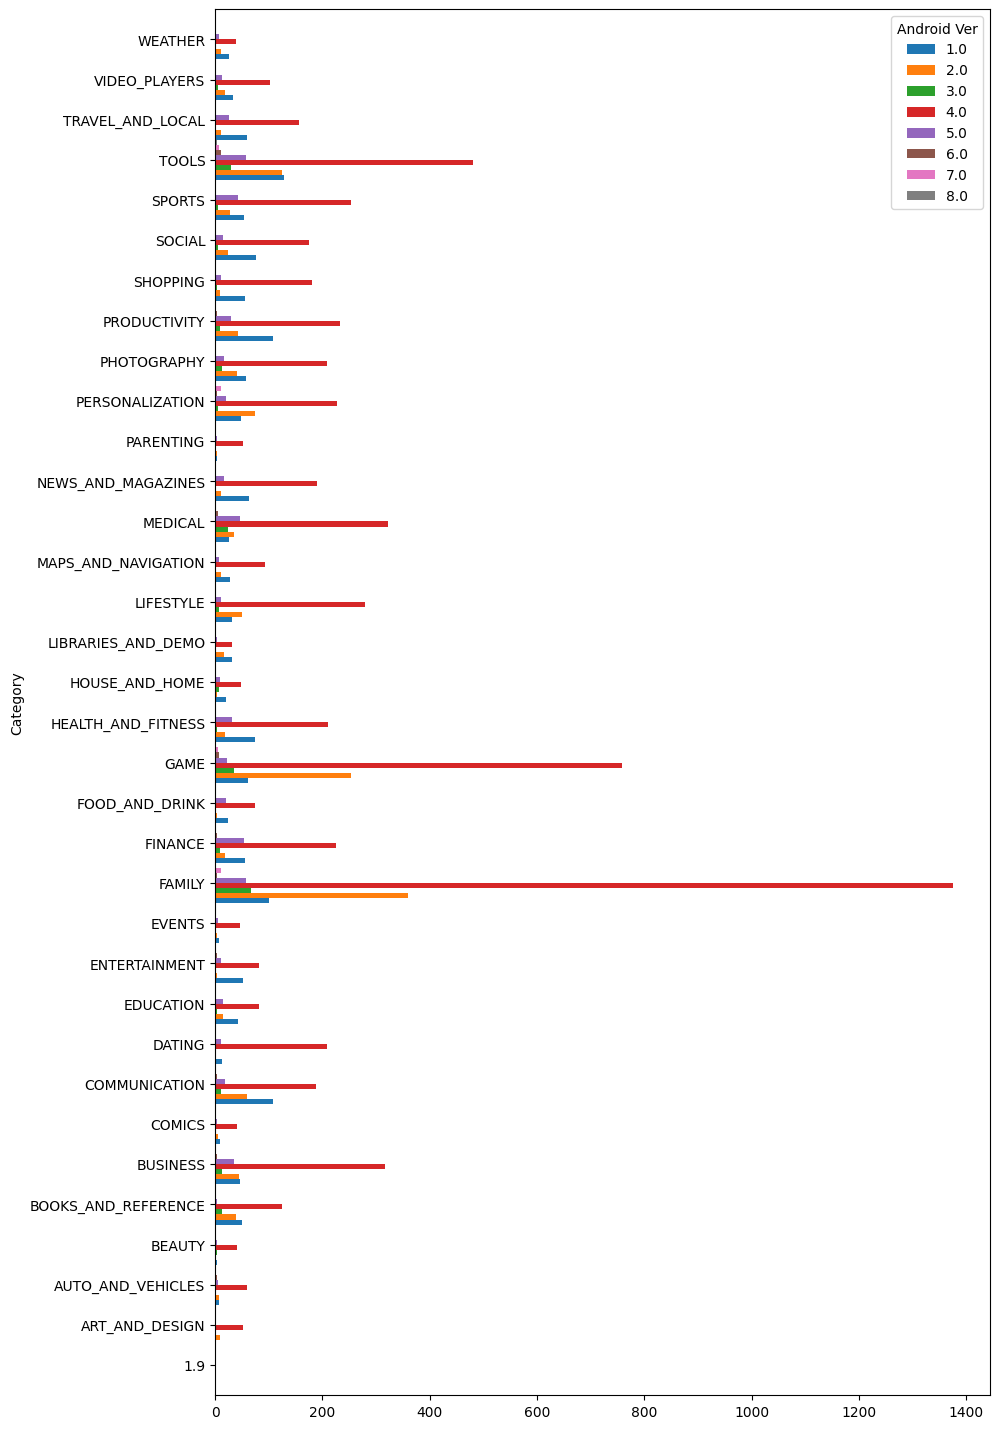

In [37]:
print(df.groupby('Category')['Android Ver'].value_counts())
Type_cat = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()